In [1]:
import pandas as pd
import datetime
import json

In [2]:
with open('transaction-data-adhoc-analysis.json','r') as f:
    data=json.load(f)

In [3]:
transactionsdf=pd.DataFrame(data)

In [4]:
transactionsdf['year'] = pd.DatetimeIndex(transactionsdf['birthdate']).year

In [5]:
transactionsdf

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,year
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,1926
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12,2016
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08,2016
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10,2016
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24,1949
...,...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05,2019
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12,1913
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15,1913
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09,1913


In [6]:
year_df=transactionsdf[["year"]]

In [7]:
year_df

,year
0,1926
1,2016
2,2016
3,2016
4,1949
...,...
83031,2019
83032,1913
83033,1913
83034,1913


In [8]:
year=year_df["year"]

In [9]:
year.sort_values(ascending=False)

75612    2022
58660    2022
46929    2022
74472    2022
30890    2022
         ... 
80911    1906
80912    1906
42360    1906
42359    1906
50860    1906
Name: year, Length: 83036, dtype: int64

In [10]:
def get_gen(x):
    if x>=2013:
        return str("Gen Alpha")
    elif x>=1997:
        return str("Gen Z")
    elif x>=1981:
        return str("Millenials")
    elif x>=1965:
        return str("Gen X")
    elif x>=1955:
        return str("Boomers II")
    elif x>=1946:
        return str("Boomers I")
    elif x>=1928:
        return str("Post War")
    elif x>=1922:
        return str("WWII")
    elif x>=1906:
        return str("Greatest Gen")




    

In [11]:
get_gen(1964)

'Boomers II'

In [12]:
year_df["Generation"]=year_df["year"].apply(get_gen)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_8245/2478221735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df["Generation"]=year_df["year"].apply(get_gen)


In [13]:
year_df

,year,Generation
0,1926,WWII
1,2016,Gen Alpha
2,2016,Gen Alpha
3,2016,Gen Alpha
4,1949,Boomers I
...,...,...
83031,2019,Gen Alpha
83032,1913,Greatest Gen
83033,1913,Greatest Gen
83034,1913,Greatest Gen


In [43]:
new_gen_gb_2=year_df.groupby(["Generation"]).size().reset_index(name='Count')
new_gen_gb_final=new_gen_gb_2.set_index("Generation")

In [44]:
new_gen_gb_final

,Count
Generation,
Boomers I,6335
Boomers II,6807
Gen Alpha,6791
Gen X,11260
Gen Z,11684
Greatest Gen,11725
Millenials,11062
Post War,12922
WWII,4450


In [72]:
list_gen=new_gen_gb_final.index

In [73]:
list_gen

Index(['Boomers I', 'Boomers II', 'Gen Alpha', 'Gen X', 'Gen Z',
       'Greatest Gen', 'Millenials', 'Post War', 'WWII'],
      dtype='object', name='Generation')

In [ ]:
list_count=new_gen_gb_final["Count"]

In [ ]:
list_count

Generation
Boomers I        6335
Boomers II       6807
Gen Alpha        6791
Gen X           11260
Gen Z           11684
Greatest Gen    11725
Millenials      11062
Post War        12922
WWII             4450
Name: Count, dtype: int64

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

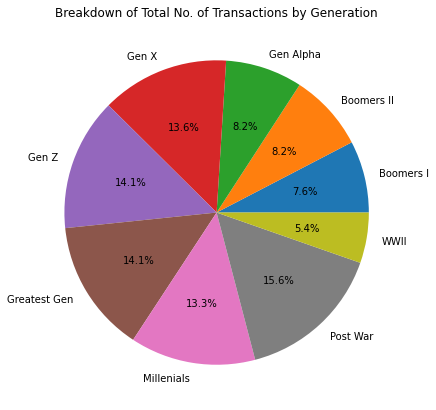

In [54]:
fig = plt.figure(figsize =(10, 7))
plt.pie(list_count,labels=list_gen,autopct='%1.1f%%')
plt.title('Breakdown of Total No. of Transactions by Generation')
plt.savefig('Breakdown of Total No. of Transactions by Generation.png', dpi=600, bbox_inches='tight')

In [55]:
year_df["Sales Value"]=transactionsdf["transaction_value"]

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_8245/60606620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df["Sales Value"]=transactionsdf["transaction_value"]


In [57]:
year_df["month"]=transactionsdf["transaction_value"]

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_8245/3425003710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df["month"]=transactionsdf["transaction_value"]


In [58]:
year_df["month"]=pd.DatetimeIndex(transactionsdf['transaction_date']).month

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_8245/3824076929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df["month"]=pd.DatetimeIndex(transactionsdf['transaction_date']).month


In [59]:
year_df

,year,Generation,Sales Value,month
0,1926,WWII,5196,1
1,2016,Gen Alpha,12056,1
2,2016,Gen Alpha,5500,1
3,2016,Gen Alpha,500,1
4,1949,Boomers I,2697,1
...,...,...,...,...
83031,2019,Gen Alpha,3588,6
83032,1913,Greatest Gen,2095,6
83033,1913,Greatest Gen,3396,6
83034,1913,Greatest Gen,4280,6


In [60]:
trial_table_final_part2=pd.pivot_table(year_df, values=["Sales Value"], index=["Generation"], columns="month", aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

In [61]:
trial_table_final_part2 #average/mean transaction values per generation per month

Sales Value                                                      \
month                   1            2            3            4            5   
Generation                                                                      
Boomers I     4509.787793  4603.440693  4712.955882  4586.989362  4758.258735   
Boomers II    4806.303965  4488.144014  4598.642669  4677.005124  4666.463436   
Gen Alpha     4498.422343  4606.896643  4669.539642  4548.155235  4571.190644   
Gen X         4588.065733  4615.136858  4650.567245  4625.541756  4568.158320   
Gen Z         4440.611023  4573.192716  4508.281504  4581.672248  4665.317160   
Greatest Gen  4494.104199  4683.498457  4563.201593  4651.916062  4546.026749   
Millenials    4574.031556  4441.734123  4575.757626  4631.266594  4496.598181   
Post War      4572.083994  4538.019177  4528.292694  4536.810900  4556.074551   
WWII          4826.521798  4536.401525  4829.760839  4576.453939  4709.721467   

                           
month                   6  
Generation                 
Boomers I     4555.535344  
Boomers II    4601.914875  
Gen Alpha     4663.995629  
Gen X         4671.525708  
Gen Z         4637.228289  
Greatest Gen  4553.901981  
Millenials    4521.154095  
Post War      4674.306535  
WWII          4496.685871

In [62]:
trial_table_final_part3=pd.pivot_table(year_df, values=["Sales Value"], index=["Generation"], columns="month", aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

In [63]:
trial_table_final_part3 #total transaction values per generation per month

Sales Value                                              
month                  1        2         3        4        5        6
Generation                                                            
Boomers I        4802924  5045371   4807215  4742947  5038996  4833423
Boomers II       5455155  4986328   5237854  5476773  5296436  5135737
Gen Alpha        4952763  5215007   5477370  5039356  5179159  5335611
Gen X            8515450  8902599   8575646  8640512  8483070  8903928
Gen Z            8379433  9041202   8872298  9030476  9134691  8917390
Greatest Gen     8669127  9104721   9167472  8978198  8837476  8966633
Millenials       8407070  8252742   8250091  8512268  8404142  8391262
Post War         9797976  9702285  10102621  9572671  9900350  9942250
WWII             3542667  3570148   3453279  3427764  3466355  3278084

In [64]:
pip install dataframe_image

Note: you may need to restart the kernel to use updated packages.


In [68]:
import dataframe_image as dfi

In [65]:
new_gen_gb_final

,Count
Generation,
Boomers I,6335
Boomers II,6807
Gen Alpha,6791
Gen X,11260
Gen Z,11684
Greatest Gen,11725
Millenials,11062
Post War,12922
WWII,4450


In [69]:
dfi.export(new_gen_gb_final,"new_gen_gb_final")

[0724/171447.939716:INFO:headless_shell.cc(660)] Written to file /var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/tmpa9i3it6c/temp.png.


In [66]:
trial_table_final_part2

Sales Value                                                      \
month                   1            2            3            4            5   
Generation                                                                      
Boomers I     4509.787793  4603.440693  4712.955882  4586.989362  4758.258735   
Boomers II    4806.303965  4488.144014  4598.642669  4677.005124  4666.463436   
Gen Alpha     4498.422343  4606.896643  4669.539642  4548.155235  4571.190644   
Gen X         4588.065733  4615.136858  4650.567245  4625.541756  4568.158320   
Gen Z         4440.611023  4573.192716  4508.281504  4581.672248  4665.317160   
Greatest Gen  4494.104199  4683.498457  4563.201593  4651.916062  4546.026749   
Millenials    4574.031556  4441.734123  4575.757626  4631.266594  4496.598181   
Post War      4572.083994  4538.019177  4528.292694  4536.810900  4556.074551   
WWII          4826.521798  4536.401525  4829.760839  4576.453939  4709.721467   

                           
month                   6  
Generation                 
Boomers I     4555.535344  
Boomers II    4601.914875  
Gen Alpha     4663.995629  
Gen X         4671.525708  
Gen Z         4637.228289  
Greatest Gen  4553.901981  
Millenials    4521.154095  
Post War      4674.306535  
WWII          4496.685871

In [70]:
dfi.export(trial_table_final_part2,"gen_mean")

[0724/171516.643165:INFO:headless_shell.cc(660)] Written to file /var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/tmpjdxokbj6/temp.png.


In [67]:
trial_table_final_part3

Sales Value                                              
month                  1        2         3        4        5        6
Generation                                                            
Boomers I        4802924  5045371   4807215  4742947  5038996  4833423
Boomers II       5455155  4986328   5237854  5476773  5296436  5135737
Gen Alpha        4952763  5215007   5477370  5039356  5179159  5335611
Gen X            8515450  8902599   8575646  8640512  8483070  8903928
Gen Z            8379433  9041202   8872298  9030476  9134691  8917390
Greatest Gen     8669127  9104721   9167472  8978198  8837476  8966633
Millenials       8407070  8252742   8250091  8512268  8404142  8391262
Post War         9797976  9702285  10102621  9572671  9900350  9942250
WWII             3542667  3570148   3453279  3427764  3466355  3278084

In [71]:
dfi.export(trial_table_final_part3,"gen_total")

[0724/171527.937899:INFO:headless_shell.cc(660)] Written to file /var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/tmp0eax63o1/temp.png.
